In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

## How good is circle detection?

In [ ]:
for path in os.listdir("pics/"):
    if path.endswith("jpg") == True:
        img = cv2.imread("pics/"+path)
        plt.imshow(img)
        img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        circles = cv2.HoughCircles(img_bw, cv2.HOUGH_GRADIENT,1,100, param1=50,param2=30,minRadius=80,maxRadius=90)
        if circles is not None:
            circles = circles.astype(int)[0,:,:]
            for pt in circles:
                a, b, r = pt[0], pt[1], pt[2]
                cv2.circle(img, (a, b), r, (0, 255, 0), 2)
                cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
            print(path, circles.shape[0])
            plt.imshow(img)
            plt.show()

## One pic tests

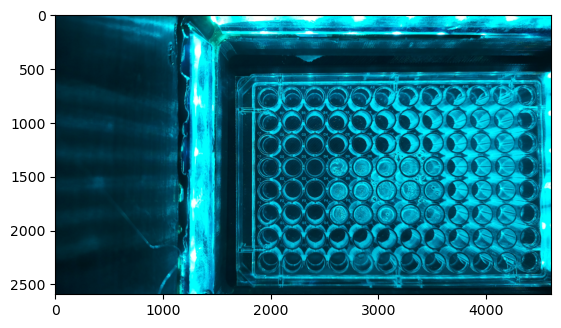

In [16]:
img_path = 'pics/Picture_g_10M5_#1_2023-04-19_14:08:37_P4_Cam3.jpg'
img = cv2.imread(img_path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb)
plt.show()

In [ ]:
circles = cv2.HoughCircles(img_bw, cv2.HOUGH_GRADIENT,1,100, param1=50,param2=30,minRadius=80,maxRadius=90)
if circles is not None:
    circles = circles.astype(int)[0,:,:]
    for pt in circles:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
plt.imshow(img)

# Wrap-up
* To wrap-up today I want to make a function that, given the location of a pocillo in the plate, it returns either:
    * The highlited pocillo if it was detected, or
    * A message saying that the Hough Circle transform didn't detect that circle

In [3]:
img_path = 'pics/Picture_g_10M5_#1_2023-04-19_14:08:37_P4_Cam3.jpg'

def locate_pocillo(img_path, position):
    img = cv2.imread(img_path)
    img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Circle detection
    circles = cv2.HoughCircles(img_bw, cv2.HOUGH_GRADIENT,1,100, param1=50,param2=30,minRadius=80,maxRadius=90)
    circles = circles.astype(int)[0,:,:]

    # Location algorithm for desired pocillo
    x_kmeans = KMeans(n_clusters=12, n_init=10).fit(circles[:,0].reshape(-1, 1))
    x_labels = x_kmeans.labels_
    x_centers = x_kmeans.cluster_centers_.squeeze()
    x_new_labels = np.zeros_like(x_labels)
    for i in range(len(x_centers)):
        x_new_labels[x_labels == i] = np.where(np.argsort(x_centers) == i)[0][0] 

    y_kmeans = KMeans(n_clusters=8, n_init=10).fit(circles[:,1].reshape(-1, 1))
    y_labels = y_kmeans.labels_
    y_centers = y_kmeans.cluster_centers_.squeeze()
    y_new_labels = np.zeros_like(y_labels)
    for i in range(len(y_centers)):
        y_new_labels[y_labels == i] = np.where(np.argsort(y_centers) == i)[0][0] 
    
    # Get center and radius of pocillo
    index_array = np.where((x_new_labels+1 == position[0]) & (y_new_labels+1 == position[1]))[0]
    
    if index_array.size ==0:
        print("Hough Transform didn't locate this one!")
    else:
        index = index_array[0]
        center = circles[index][:-1]
        radius = circles[index][-1]
        # Plot
        my_point = cv2.circle(img_bw, center, radius, (255, 0, 0), -1)
        plt.imshow(my_point, cmap = "binary")
        plt.show()

In [ ]:
def letter_position(letter):
    if len(letter) != 1 or not letter.isalpha():
        # Handle invalid input
        return None
    else:
        # Convert letter to lowercase and get its Unicode code point
        code_point = ord(letter.lower())
        # Subtract the code point of 'a' to get the position in the alphabet
        return code_point - ord('a') + 1

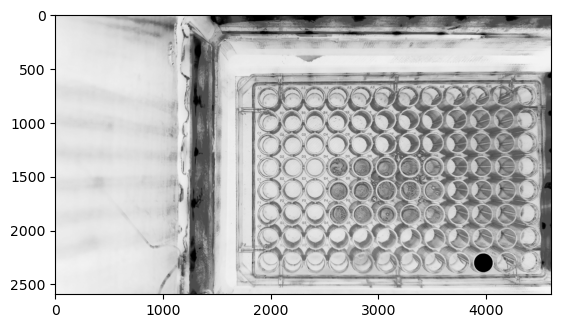

In [4]:
locate_pocillo(img_path, (10,8))

In [ ]:
locate_pocillo(img_path, (10,1))